In [ ]:
# Step 1
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
import gc

In [ ]:
# Create path
path =  r'C:\Users\Marker\Videos\Instakart Basket Analysis 01-25'

In [ ]:
# Import the newly merged data frame
df_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))


<Axes: xlabel='order_dow'>

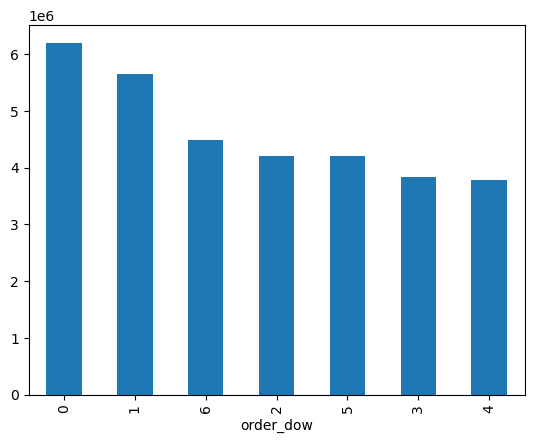

In [116]:
# Step 2
# Plotting the bar chart
df_merge['order_dow'].value_counts().plot.bar()

In [164]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int64   
 1   product_name            object  
 2   aisle_id                int64   
 3   department_id           int64   
 4   prices                  float64 
 5   order_id                int64   
 6   user_id                 int64   
 7   order_number            int64   
 8   order_dow               int64   
 9   order_hour_of_day       int64   
 10  days_since_prior_order  float64 
 11  add_to_cart_order       int64   
 12  reordered               int64   
 13  _merge                  category
 14  price_range_loc         object  
 15  Busiest_day             object  
 16  Busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_spend           float64 
 21  spende

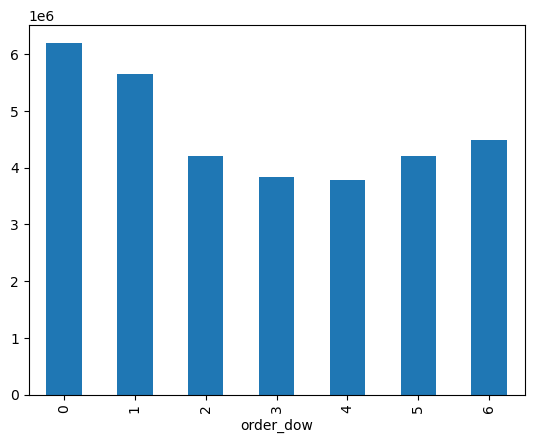

In [75]:
# Indexing by orders of days of week
bar1 = df_merge['order_dow'].value_counts().sort_index().plot.bar()

In [120]:
# Creating a sample of the dataframe
sample_df = df_merge.sample(n=50000, random_state=1)

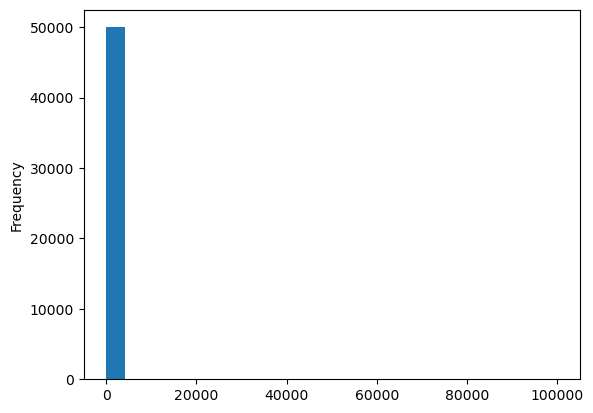

In [122]:
# Creating histogram
hist1 = sample_df['prices'].plot.hist(bins = 24)

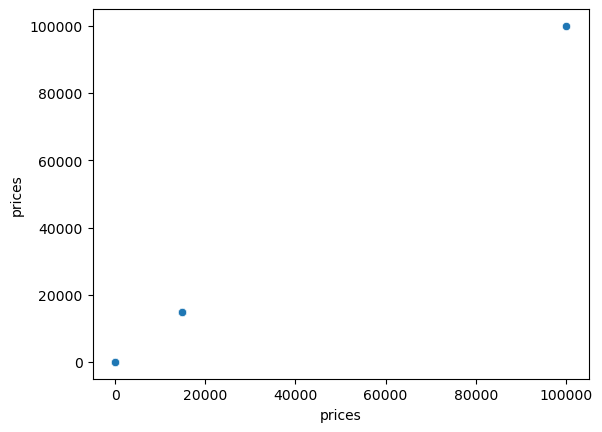

In [124]:
# Creating scatterplot
scatter1 = sns.scatterplot(x = 'prices', y = 'prices',data = sample_df)


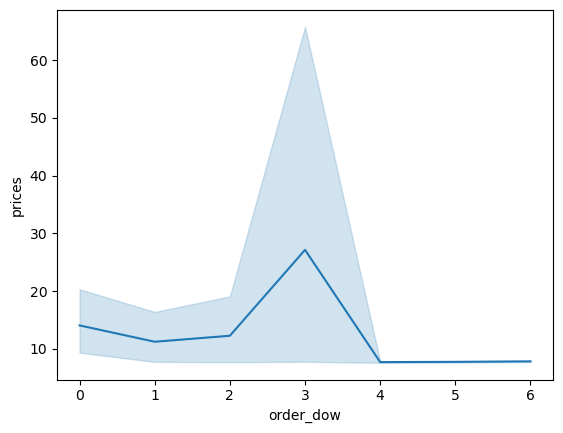

In [126]:
# Creating a line chart
line1 = sns.lineplot(data = sample_df, x = 'order_dow',y = 'prices')

In [128]:
# Assigning null values to outliers
sample_df.loc[sample_df['prices'] >100, 'prices'] = np.nan

In [130]:
# Finding max value in prices
sample_df['prices'].max()

25.0

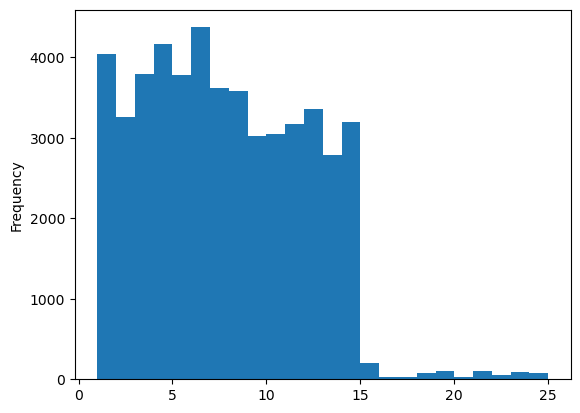

In [132]:
hist1 = sample_df['prices'].plot.hist(bins = 24)

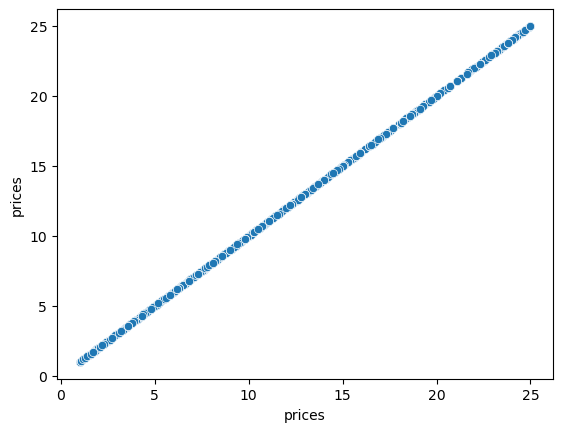

In [134]:
scatter1 = sns.scatterplot(x = 'prices', y = 'prices',data = sample_df)

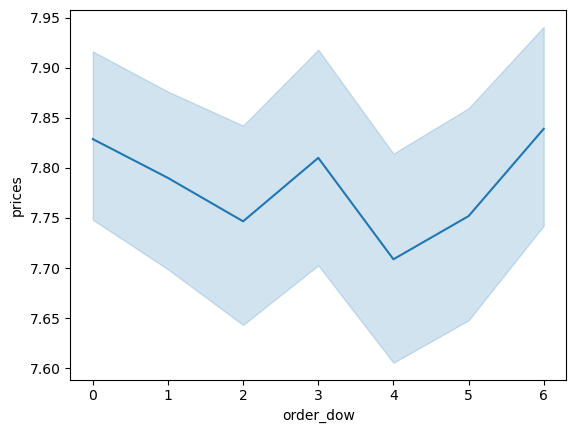

In [136]:
line2 = sns.lineplot(data = sample_df, x = 'order_dow',y = 'prices')

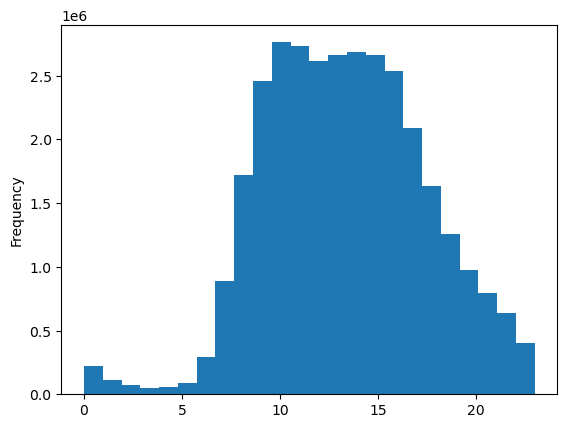

In [31]:
# Step 3
# Creating histogram for 'order_hour_of_day'
histm = df_merge['order_hour_of_day'].plot.hist(bins = 24)

The busiest hours of the day are from 9am to 5pm.

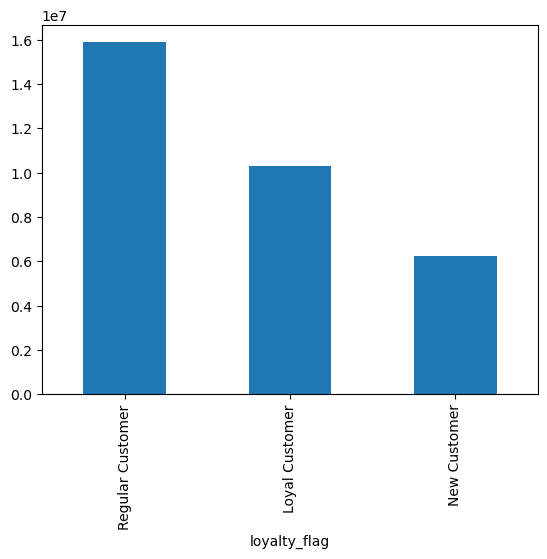

In [77]:
# Step 4
# Creating a bar chart for "loyalty_flag"

bar = df_merge['loyalty_flag'].value_counts().plot.bar()

In [ ]:
# Step 5
# Creating a sample of the dataframe


In [172]:
# Setting the seed
np.random.seed(10)

In [174]:
# Assigning 'dev'
dev = np.random.rand(len(df_merge)) <= 0.7

In [34]:
big = df_merge[dev]

In [35]:
small = df_merge[~dev]

In [38]:
len(df_merge)

32404859

In [42]:
len(big) + len(small)

32404859

In [55]:
df_2 = small[['order_hour_of_day','prices']]

In [ ]:
df_2.head()

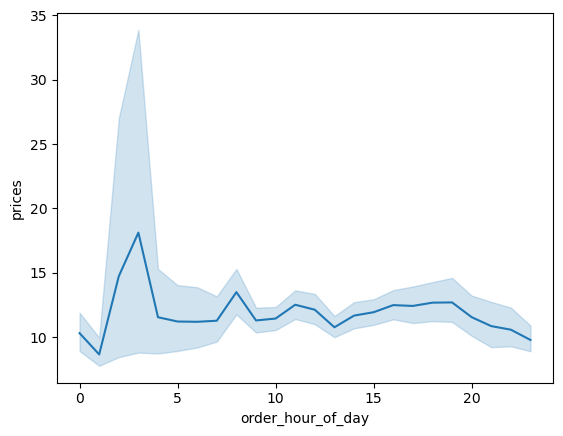

In [68]:
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

Yes there is a differece in expenditure/price during during the day.

In [106]:
# Step 6
# Creating a sample of the dataframe
sampled_df = df_merge.sample(n=100000, random_state=1)
sampled_df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'price_range_loc', 'Busiest_day', 'Busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_spend',
       'spender_flag', 'Customer_frequency', 'frequency_flag', 'First Name',
       'Last Name', 'Gender', 'State', 'Age', 'Date Joined',
       'Number of Dependents', 'Family Status', 'Income'],
      dtype='object')

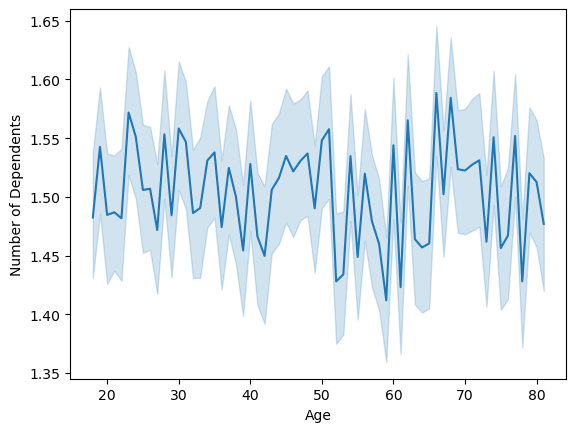

In [107]:
# Creating a line chart
line_age = sns.lineplot(data = sampled_df, x = 'Age', y = 'Number of Dependents')

There is no clear correlation between 'Age' and 'Number of Dependents'¶

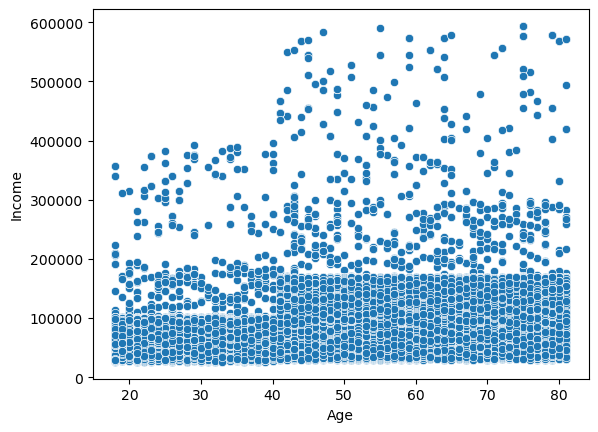

In [112]:
# Step 7
# Creating a scatterplot of 'Age' and 'Income'
scatter = sns.scatterplot(x='Age', y='Income', data = sampled_df)

There is a wide range of incomes among the younger age groups, particularly from ages 20 to around 40, with a concentration at the lower end of the income scale. Starting from around age 40 and onwards, there appears to be an upward trend in income, with many of the data points concentrated in the higher income brackets. This could suggest that income increases with age. The densest concentration of points for individuals over 40 is significantly higher on the income scale compared to those under 40, which could indicate that the median income increases with age. The scatterplot provides a visual representation that can hint at certain trends, like potential increases in income with age, but it would require statistical analysis to confirm any correlations or to understand the nuances of the relationship between age and income among the customers.

In [ ]:
#Step 8
# Exporting and saving images
histm.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [81]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [114]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_hour_of_day.png'))

In [ ]:
line_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_number_of_dependents.png'))

In [138]:
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))